In [0]:
# http://pytorch.org/
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
import torch

In [0]:
a= torch.tensor([[1,2,3],[4,5,6]], requires_grad=True, dtype=torch.float)
b=a+2
c=2*b*b
out=c.mean()
out.backward()
print(a.grad)

tensor([[2.0000, 2.6667, 3.3333],
        [4.0000, 4.6667, 5.3333]])


## Linear Regression

In [0]:
import torch.nn as nn

In [0]:
class Network(nn.Module):
  def __init__(self, in_dim,out_dim):
    super(Network,self).__init__()
    self.linear=nn.Linear(in_dim,out_dim)
    
  def forward(self,x):
    out=self.linear(x)
    return out
  
    

$y =$ w0 + w1 * x

- The nn.linear class contains two learnable variables: bias and weight. In our single feature model, these are the two parameters, w0 and w1, respectively. When we train a model, these variables are updated, ideally to values that approach the line of best fit to the data. Finally, in the preceding code, we instantiate the model by creating the variable, model, and setting it to our LinearModel class.

In [0]:
model=Network(1,1)

In [0]:
learningrate=0.01
optimizer=torch.optim.SGD(model.parameters(), lr=learningrate)

In [0]:
criterian=nn.MSELoss()

In [0]:
x_train=torch.tensor([1,2,3,4,5,6,7,8,9,10], dtype=torch.float).reshape(-1,1)
y_train=torch.tensor([3*x+5 for x in x_train]).reshape(-1,1)


-  Values are reshape in [-1,1]

-  Now we are ready to run the linear model and to do this we run it in a loop for each epoch. This training cycle consists of the following three steps:

    1.  A forward pass over the training set
    2. A backward pass to compute the loss
    3. Updating the parameters according to the gradient of the loss function


In [0]:
epochs=100
for epoch in range(epochs):
  epoch +=1
  input1=x_train
  labels= y_train
  out=model(input1)
  optimizer.zero_grad()
  loss= criterian(out, labels)
  loss.backward()
  optimizer.step()
  predicted=model.forward(x_train)
  print('epoch{}, loss {}'.format(epoch,loss.item()))
  

epoch1, loss 332.1545104980469
epoch2, loss 20.776260375976562
epoch3, loss 6.4433770179748535
epoch4, loss 5.73974609375
epoch5, loss 5.661837100982666
epoch6, loss 5.613012790679932
epoch7, loss 5.5659050941467285
epoch8, loss 5.519254207611084
epoch9, loss 5.472992897033691
epoch10, loss 5.427122592926025
epoch11, loss 5.38163423538208
epoch12, loss 5.336526393890381
epoch13, loss 5.291799545288086
epoch14, loss 5.247446537017822
epoch15, loss 5.203464984893799
epoch16, loss 5.159852981567383
epoch17, loss 5.116604804992676
epoch18, loss 5.0737199783325195
epoch19, loss 5.031197547912598
epoch20, loss 4.9890289306640625
epoch21, loss 4.947214603424072
epoch22, loss 4.905747413635254
epoch23, loss 4.864631175994873
epoch24, loss 4.823859214782715
epoch25, loss 4.783426761627197
epoch26, loss 4.743335723876953
epoch27, loss 4.703577995300293
epoch28, loss 4.664156436920166
epoch29, loss 4.625065803527832
epoch30, loss 4.586301326751709
epoch31, loss 4.5478620529174805
epoch32, loss 4.

In [0]:
print(model.state_dict())

OrderedDict([('linear.weight', tensor([[3.4929]])), ('linear.bias', tensor([1.5688]))])


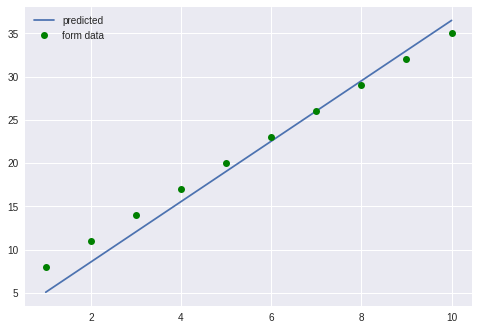

In [0]:
import matplotlib.pyplot as plt
x=x_train.detach().numpy()
plt.plot(x,predicted.detach().numpy(),label='predicted')
plt.plot(x, y_train.detach().numpy(),'go',label='form data')
plt.legend()
plt.show()